In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
path_to_csv = './music_album_reviews.csv'
df = pd.read_csv(path_to_csv)

In [16]:
max(df['Rating'].values)

5.0

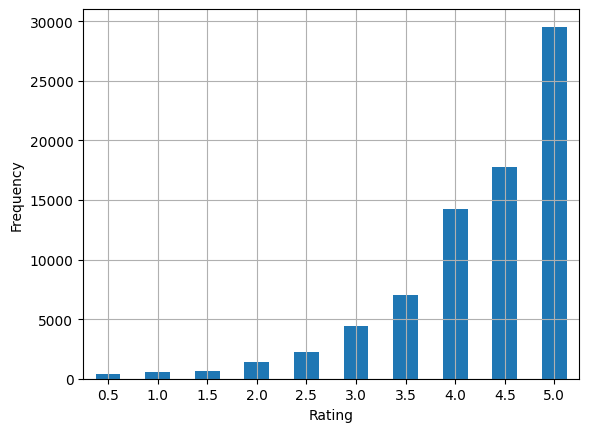

In [17]:
df['Rating'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [18]:
mydf = df.copy()
mydf['num_chars'] = mydf['Review'].apply(lambda x: len(str(x)))


In [19]:
corr_matrix = mydf.corr(numeric_only=True)
corr_matrix['Rating'].sort_values(ascending=False)

Rating       1.000000
num_chars    0.036936
Name: Rating, dtype: float64

array([[<Axes: xlabel='Rating', ylabel='Rating'>,
        <Axes: xlabel='num_chars', ylabel='Rating'>],
       [<Axes: xlabel='Rating', ylabel='num_chars'>,
        <Axes: xlabel='num_chars', ylabel='num_chars'>]], dtype=object)

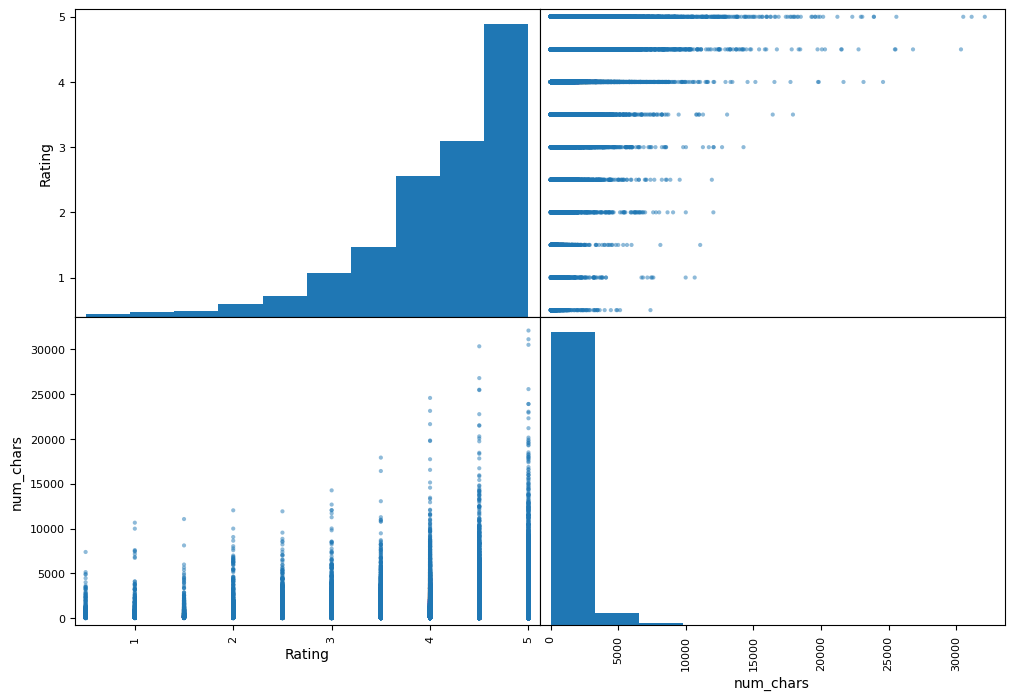

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['Rating','num_chars']
scatter_matrix(mydf[attributes],figsize=(12,8))

In [21]:
from textblob import TextBlob
def pol_subj(review: str) -> list:
    sentiment = TextBlob(review).sentiment
    return sentiment.polarity, sentiment.subjectivity

In [22]:
from textblob import TextBlob
mydf['polarity'], mydf['subjectivity'] = zip(*mydf['Review'].apply(lambda x: pol_subj(str(x))))

In [23]:
print(mydf.corr(numeric_only=True))

                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.036936  0.202607      0.005538
num_chars     0.036936   1.000000 -0.116568      0.022674
polarity      0.202607  -0.116568  1.000000      0.288409
subjectivity  0.005538   0.022674  0.288409      1.000000


In [51]:
inner_rating_data = []
bin_size = 2
for t in range(1,11,bin_size):
    min_rating = t*5/10
    max_rating = (t+bin_size)*5/10
    temp_df = mydf[(mydf['Rating'] >= min_rating) & (mydf['Rating'] < max_rating)]
    inner_rating_data.append(temp_df)
    


In [52]:
for e in inner_rating_data:
    print(e.corr(numeric_only=True),end='\n\n')


                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.071111  0.044032     -0.007522
num_chars     0.071111   1.000000  0.093562      0.068229
polarity      0.044032   0.093562  1.000000     -0.170924
subjectivity -0.007522   0.068229 -0.170924      1.000000

                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.026428  0.046281     -0.046585
num_chars     0.026428   1.000000  0.063955      0.029170
polarity      0.046281   0.063955  1.000000     -0.051931
subjectivity -0.046585   0.029170 -0.051931      1.000000

                Rating  num_chars  polarity  subjectivity
Rating        1.000000  -0.008990  0.098764     -0.022818
num_chars    -0.008990   1.000000 -0.032450      0.019259
polarity      0.098764  -0.032450  1.000000      0.135299
subjectivity -0.022818   0.019259  0.135299      1.000000

                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.031802  0.057485      0.007822
num_chars  

In [58]:
inner_polarity_data = []
bin_size = 10
for t in range(-10,10,bin_size):
    min_polarity = t/10
    max_polarity = (t+bin_size)*10
    temp_df = mydf[(mydf['polarity'] >= min_polarity) & (mydf['polarity'] <= max_polarity)]
    inner_polarity_data.append(temp_df)

In [59]:
for e in inner_polarity_data:
    print(e.corr(numeric_only=True),end='\n\n')

                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.000402  0.124365     -0.190888
num_chars     0.000402   1.000000 -0.007863      0.167437
polarity      0.124365  -0.007863  1.000000     -0.566104
subjectivity -0.190888   0.167437 -0.566104      1.000000

                Rating  num_chars  polarity  subjectivity
Rating        1.000000   0.024839  0.166978      0.030031
num_chars     0.024839   1.000000 -0.188989      0.034658
polarity      0.166978  -0.188989  1.000000      0.450073
subjectivity  0.030031   0.034658  0.450073      1.000000



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from textblob import TextBlob
import pandas as pd

In [2]:
path_to_csv = './music_album_reviews.csv'
df = pd.read_csv(path_to_csv)

# Dropping entries with null values
empty_review_indices = df[(df['Review'].isnull()) | (df['Rating'].isnull())].index
print(f'Number of samples with some null value:\n- {len(empty_review_indices)} ({len(empty_review_indices)/len(df)*100:.2f}% of the set)')
df.drop(empty_review_indices, inplace=True)

Number of samples with some null value:
- 2109 (2.63% of the set)


In [3]:
def detect_lang(review: str) -> str:
    try:
        return detect(review)
    except:
        return 'unk'
    
languages = set()
df['language'] = df['Review'].apply(lambda x: detect_lang(str(x)))

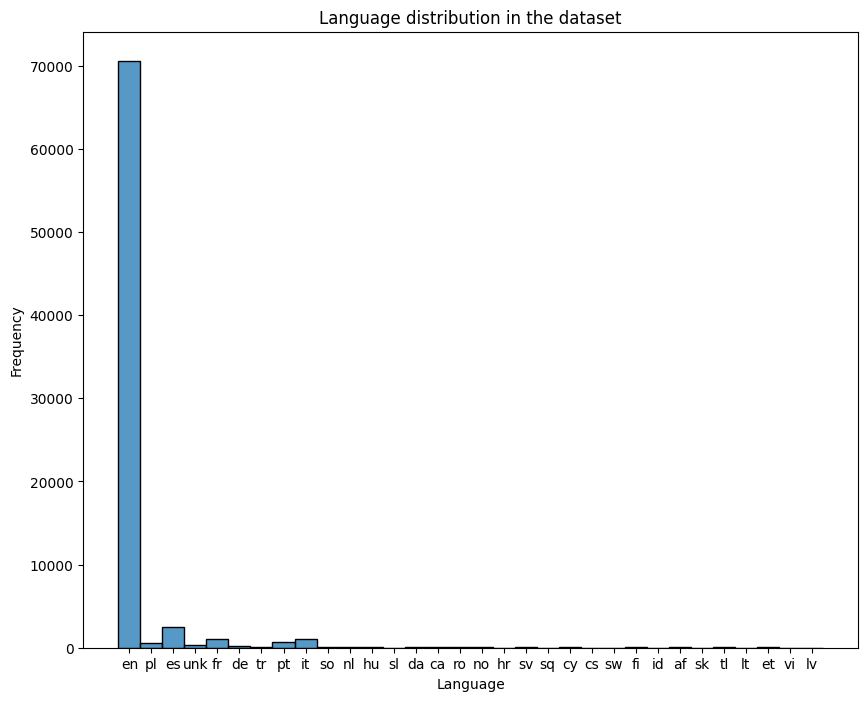

In [4]:
sns.histplot(df['language'], discrete=True)
plt.xlabel('Language')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Language distribution in the dataset')
plt.show()

In [5]:
df = df[df['language'] == 'en'].reset_index(drop=True)
df.drop(columns=['language'], inplace=True)

In [10]:
df

,Review,Rating
0,i think i actually under-rate ok computer if a...,5.0
1,i get why radiohead rub a lot of people the wr...,5.0
2,i would like to think i am good about not lett...,4.5
3,there are radiohead devotees like there were o...,4.0
4,i wrote a shining excellent review for this al...,5.0
...,...,...
70546,my favorites here are the steamy lady cab driv...,3.0
70547,prince would have been well-advised to make th...,4.5
70548,you know you cannot say its not a classic beca...,3.5
70549,the classic prince album.,5.0


In [13]:
def pol_subj(review: str) -> list:
    sentiment = TextBlob(review).sentiment
    return sentiment.polarity, sentiment.subjectivity

df['polarity'], df['subjectivity'] = zip(*df['Review'].apply(lambda x: pol_subj(str(x))))

In [15]:
df.corr(numeric_only=True)

,Rating,polarity,subjectivity
Rating,1.000000,0.226741,0.006838
polarity,0.226741,1.000000,0.240899
subjectivity,0.006838,0.240899,1.000000


<Axes: xlabel='Rating'>

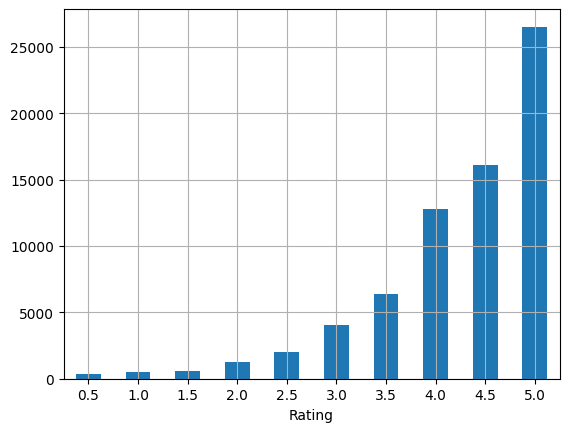

In [19]:
df['Rating'].value_counts().sort_index().plot.bar(rot=0,grid=True)

<Axes: >

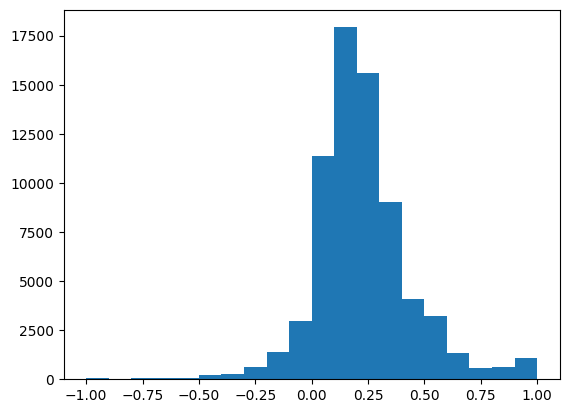

In [20]:
df['polarity'].hist(bins=20,grid=False)

array([[<Axes: xlabel='Rating', ylabel='Rating'>,
        <Axes: xlabel='polarity', ylabel='Rating'>],
       [<Axes: xlabel='Rating', ylabel='polarity'>,
        <Axes: xlabel='polarity', ylabel='polarity'>]], dtype=object)

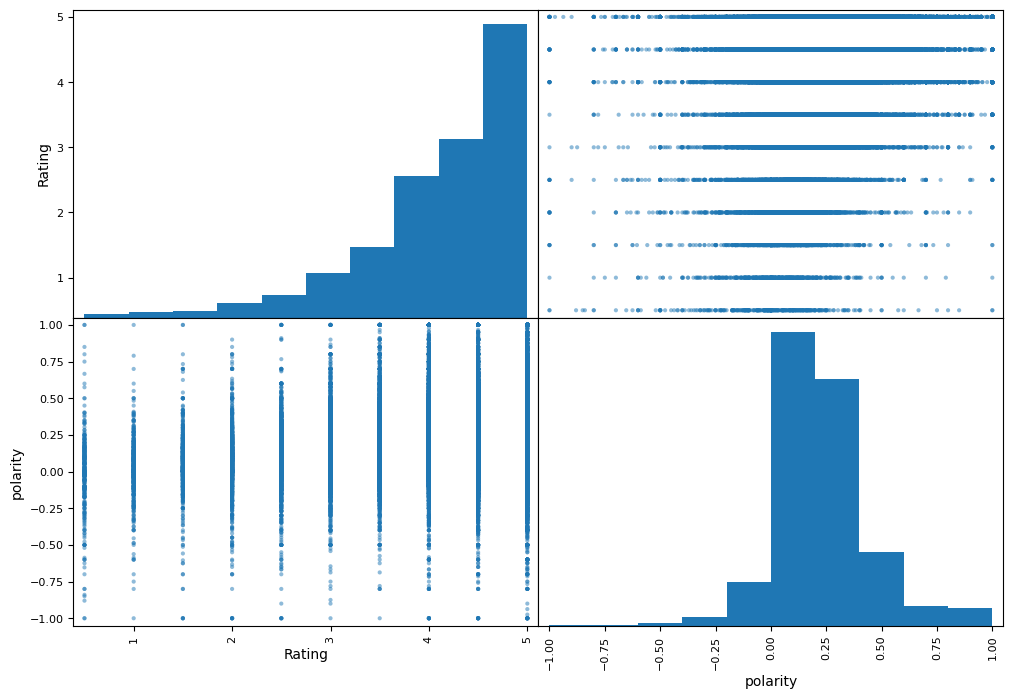

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Rating','polarity']],figsize=(12,8))

idea

- remove all rows that have an empty field
- remove all non english reviews
- 